In [99]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import numpy as np
pd.set_option('display.max_columns', 500)

In [ ]:
df = pd.read_pickle('auto_matrix.pickle')

#remove bulletproof expensive cars
df = df[df['Price_rub'] < 3.5 * 10 ** 6]

In [89]:
df['person_seller'] = df['Seller'] == 'person'

In [87]:
df.head(3)

,Advertising_num_days,CarName,ID,Price_rub,Seller,Seller_location,Views,Car_age,Gear_box,Parsing date,Autocode_checked,Owners_N,Last_owner_time_years,Warranty_end,Engine_capacity,Engine_hp,Engine_fuel_type,Body_type,Swap_type,Original_car_passport,Wheel_drive_type,run_km,Left_steering,is_metallic_color,Color,Opt_Обивка салона: кожа,Opt_Цвет салона: темный,Opt_Люк на крыше,Opt_Ксеноновые фары,Opt_Штатная,Opt_Иммобилайзер,Opt_Обратная связь,Opt_Бортовой компьютер,Opt_Датчик дождя,Opt_Датчик света,Opt_Круиз-контроль,Opt_Обогрев зеркал,Opt_Омыватель фар,Opt_Усилитель руля,Opt_Центральный замок,Opt_Обогрев сидений,Opt_Климат: климат-контроль 2-зонный,Opt_Электропривод зеркал,Opt_Стеклоподъемники: электро все,Opt_Сиденье водителя: с памятью положения,Opt_Сиденье пассажира: с памятью положения,Opt_Регулировка руля: в двух плоскостях,Opt_Антиблокировочная система (ABS),Opt_Антипробуксовочная система,Opt_Система курсовой устойчивости,Opt_Парктроник,Opt_Подушки безопасности: передние и боковые,Opt_CD,Opt_Тонированные стекла,Opt_Стеклоподъемники: ручные,Opt_Сиденье водителя: ручная,Opt_Сиденье пассажира: ручная,"Opt_Легкосплавные диски: 17""",Opt_Количество мест: 5,Opt_Сиденье водителя: электро,Opt_Сиденье пассажира: электро,Opt_Обивка салона: комбинированный,"Opt_Легкосплавные диски: 18""",Opt_Климат: климат-контроль 1-зонный,Opt_Дистанционный запуск двигателя,Opt_Подогрев руля,Opt_Цвет салона: светлый,Opt_Обивка салона: велюр,"Opt_Легкосплавные диски: 15""",Opt_Климат: кондиционер,Opt_Кассетник,"Opt_Легкосплавные диски: 16""",Opt_Количество мест: 2,Opt_Регулировка руля: в одной плоскости,Opt_Навигационная система,Opt_Количество мест: 4,Opt_Подушки безопасности: водителя и пассажира,Opt_Обивка салона: ткань,Opt_,"Opt_Легкосплавные диски: 12""",Opt_Сиденье водителя: ручная по высоте,Opt_Сиденье пассажира: ручная по высоте,Opt_TV,Opt_Климат: климат-контроль 3-зонный,Opt_Регулировка руля: электро,Opt_Газобаллонное оборудование,Opt_Стеклоподъемники: электро передние,Opt_Подушки безопасности: водителя,"Opt_Легкосплавные диски: 20""","Opt_Легкосплавные диски: 13""","Opt_Легкосплавные диски: 19""","Opt_Легкосплавные диски: 14""",Opt_Количество мест: 7,Opt_Количество мест: 6,person_seller
0,9,Honda Accord VIII,1034380470,705000,person,Москва,15696,8,Автоматическая,2016-04-05,0,1,1.500000,0,2.4,201,бензин,Седан,Рассмотрю варианты,1,Передний,123000,1,0,Cеребристый,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,18,Honda Accord VII,1033695515,460000,person,"Москва, прочие адреса",66369,11,Автоматическая,2016-04-05,0,2,0.416667,0,2.4,190,бензин,Седан,Не интересует,1,Передний,160000,1,0,Черный,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2,9,Honda Accord VII,1034374506,525000,other,"Москва, прочие адреса",8540,9,Автоматическая,2016-04-05,0,1,1.500000,0,2.4,190,бензин,Седан,Не интересует,1,Передний,152000,1,1,Черный,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


# regression approach

In [90]:
# Fit and summarize OLS model
mod = sm.ols(formula='np.log(Price_rub) ~ CarName + np.log(Advertising_num_days)+np.log(Views)+ np.log(Car_age+1)'+ \
             '+ Gear_box + Owners_N + Last_owner_time_years + Warranty_end + Engine_capacity + Engine_hp + Engine_fuel_type' + \
             ' + Body_type + Swap_type + Original_car_passport + Wheel_drive_type + run_km + Left_steering + is_metallic_color+person_seller', 
             data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(Price_rub)   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1516.
Date:                Thu, 14 Apr 2016   Prob (F-statistic):               0.00
Time:                        00:17:42   Log-Likelihood:                 1978.3
No. Observations:                2684   AIC:                            -3849.
Df Residuals:                    2630   BIC:                            -3530.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------

In [91]:
df['Swap_type'].value_counts()

Не интересует            2477
Рассмотрю варианты        154
С доплатой покупателя      30
С доплатой продавца        23
Name: Swap_type, dtype: int64

### residual analysis

In [124]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res.resid)
dict(zip(name,list(test)))

{'Chi^2 two-tail prob.': 0.0,
 'Jarque-Bera': 1606.1485437698768,
 'Kurtosis': 6.74383330678392,
 'Skew': -0.29397966296907746}

(array([   1.,    0.,    2.,    2.,    1.,    9.,   15.,   24.,   79.,
         264.,  588.,  823.,  538.,  212.,   89.,   24.,    6.,    3.,
           2.,    2.]),
 array([-0.83357852, -0.76045526, -0.68733201, -0.61420875, -0.5410855 ,
        -0.46796224, -0.39483899, -0.32171573, -0.24859248, -0.17546922,
        -0.10234597, -0.02922271,  0.04390054,  0.1170238 ,  0.19014705,
         0.26327031,  0.33639356,  0.40951682,  0.48264007,  0.55576333,
         0.62888658]),
 <a list of 20 Patch objects>)

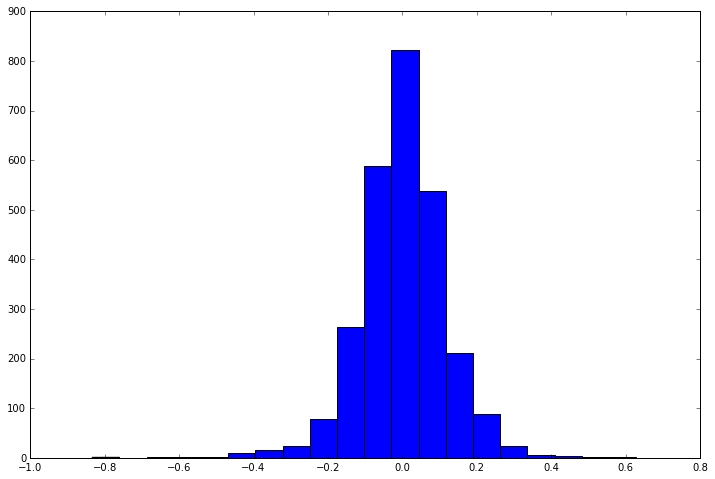

In [97]:
plt.hist(res.resid,bins=20)

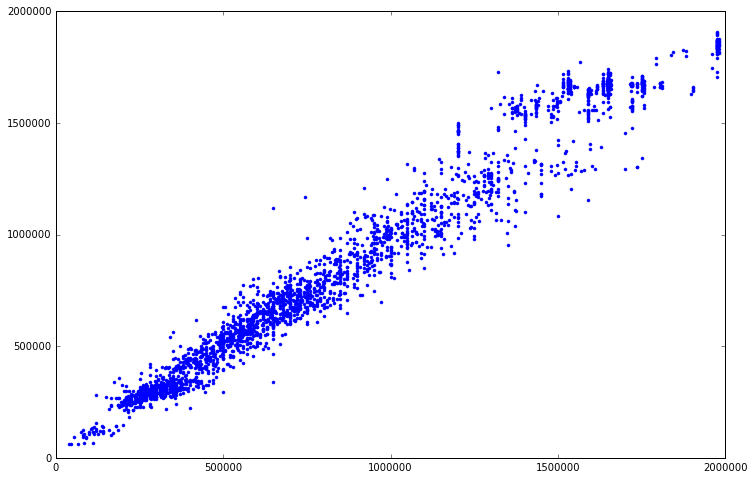

In [66]:
pylab.rcParams['figure.figsize'] = 12, 8
plt.plot(df.Price_rub,np.exp(res.fittedvalues),'.')

,Advertising_num_days,CarName,ID,Price_rub,Seller,Seller_location,Views,Car_age,Gear_box,Parsing date,Autocode_checked,Owners_N,Last_owner_time_years,Warranty_end,Engine_capacity,Engine_hp,Engine_fuel_type,Body_type,Swap_type,Original_car_passport,Wheel_drive_type,run_km,Left_steering,is_metallic_color,Color,Opt_Обивка салона: кожа,Opt_Цвет салона: темный,Opt_Люк на крыше,Opt_Ксеноновые фары,Opt_Штатная,Opt_Иммобилайзер,Opt_Обратная связь,Opt_Бортовой компьютер,Opt_Датчик дождя,Opt_Датчик света,Opt_Круиз-контроль,Opt_Обогрев зеркал,Opt_Омыватель фар,Opt_Усилитель руля,Opt_Центральный замок,Opt_Обогрев сидений,Opt_Климат: климат-контроль 2-зонный,Opt_Электропривод зеркал,Opt_Стеклоподъемники: электро все,Opt_Сиденье водителя: с памятью положения,Opt_Сиденье пассажира: с памятью положения,Opt_Регулировка руля: в двух плоскостях,Opt_Антиблокировочная система (ABS),Opt_Антипробуксовочная система,Opt_Система курсовой устойчивости,Opt_Парктроник,Opt_Подушки безопасности: передние и боковые,Opt_CD,Opt_Тонированные стекла,Opt_Стеклоподъемники: ручные,Opt_Сиденье водителя: ручная,Opt_Сиденье пассажира: ручная,"Opt_Легкосплавные диски: 17""",Opt_Количество мест: 5,Opt_Сиденье водителя: электро,Opt_Сиденье пассажира: электро,Opt_Обивка салона: комбинированный,"Opt_Легкосплавные диски: 18""",Opt_Климат: климат-контроль 1-зонный,Opt_Дистанционный запуск двигателя,Opt_Подогрев руля,Opt_Цвет салона: светлый,Opt_Обивка салона: велюр,"Opt_Легкосплавные диски: 15""",Opt_Климат: кондиционер,Opt_Кассетник,"Opt_Легкосплавные диски: 16""",Opt_Количество мест: 2,Opt_Регулировка руля: в одной плоскости,Opt_Навигационная система,Opt_Количество мест: 4,Opt_Подушки безопасности: водителя и пассажира,Opt_Обивка салона: ткань,Opt_,"Opt_Легкосплавные диски: 12""",Opt_Сиденье водителя: ручная по высоте,Opt_Сиденье пассажира: ручная по высоте,Opt_TV,Opt_Климат: климат-контроль 3-зонный,Opt_Регулировка руля: электро,Opt_Газобаллонное оборудование,Opt_Стеклоподъемники: электро передние,Opt_Подушки безопасности: водителя,"Opt_Легкосплавные диски: 20""","Opt_Легкосплавные диски: 13""","Opt_Легкосплавные диски: 19""","Opt_Легкосплавные диски: 14""",Opt_Количество мест: 7,Opt_Количество мест: 6
326,14,Toyota Camry VII,1033994711,4250000,other,"Москва, прочие адреса",1891,0,Автоматическая,2016-04-05,0,not mentioned,1.500000,0.000000,3.5,249,бензин,Седан,Не интересует,1,Передний,4738.651344,1,1,Черный,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
819,21,Toyota Camry VII,1033486985,3520000,person,Москва,29661,0,Автоматическая,2016-04-05,0,not mentioned,0.333333,1.741309,3.5,249,бензин,Седан,Не интересует,1,Передний,49.000000,1,1,Белый,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [38]:
np.corrcoef(df['Views'], df['Advertising_num_days'])

array([[ 1.        ,  0.10320365],
       [ 0.10320365,  1.        ]])

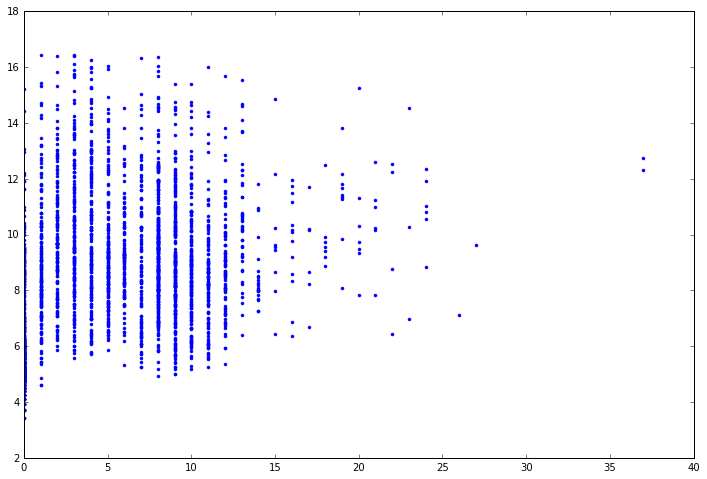

In [47]:
plt.plot(df['Car_age'],np.log(df['Views']),'.')

# Machine Learning approach

In [ ]:
y = df['Price_rub']
X = df
del X['Price_rub']
del X['ID']
del X['Parsing date']